Importing libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Import Dataset

In [20]:
df = pd.read_csv('./data/Food_insecurity_economic_family_type.csv')
df.head()

,REF_DATE,GEO,DGUID,Economic family type,Household food security status,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,16.8,B,NaN,NaN,1
1,2019,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,15.9,B,NaN,NaN,1
2,2020,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,15.7,B,NaN,NaN,1
3,2021,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,18.4,A,NaN,NaN,1
4,2022,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,22.9,A,NaN,NaN,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   REF_DATE                        108 non-null    int64  
 1   GEO                             108 non-null    object 
 2   DGUID                           108 non-null    object 
 3   Economic family type            108 non-null    object 
 4   Household food security status  108 non-null    object 
 5   Statistics                      108 non-null    object 
 6   UOM                             108 non-null    object 
 7   UOM_ID                          108 non-null    int64  
 8   SCALAR_FACTOR                   108 non-null    object 
 9   SCALAR_ID                       108 non-null    int64  
 10  VECTOR                          108 non-null    object 
 11  COORDINATE                      108 non-null    object 
 12  VALUE                           108 

Drop unwanted columns

In [22]:
cols_to_drop = [
    'DGUID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL',
    'TERMINATED', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID'
]
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

Rename columns

In [23]:
rename_map = {
    'REF_DATE': 'Year',
    'GEO': 'Region',
    'Economic family type': 'FamilyType',
    'Household food security status': 'FoodSecurityStatus',
    'Statistics': 'StatisticType',
    'UOM': 'Unit',
    'VALUE': 'Value',
    'DECIMALS': 'Decimals'
}
df.rename(columns=rename_map, inplace=True)

In [24]:
df.head()

,Year,Region,FamilyType,FoodSecurityStatus,StatisticType,Unit,Value,Decimals
0,2018,Canada,All persons,Food insecure,Percentage of persons,Percent,16.8,1
1,2019,Canada,All persons,Food insecure,Percentage of persons,Percent,15.9,1
2,2020,Canada,All persons,Food insecure,Percentage of persons,Percent,15.7,1
3,2021,Canada,All persons,Food insecure,Percentage of persons,Percent,18.4,1
4,2022,Canada,All persons,Food insecure,Percentage of persons,Percent,22.9,1


Convert “Value” column to a numerical type

In [25]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

In [26]:
df.head()

,Year,Region,FamilyType,FoodSecurityStatus,StatisticType,Unit,Value,Decimals
0,2018,Canada,All persons,Food insecure,Percentage of persons,Percent,16.8,1
1,2019,Canada,All persons,Food insecure,Percentage of persons,Percent,15.9,1
2,2020,Canada,All persons,Food insecure,Percentage of persons,Percent,15.7,1
3,2021,Canada,All persons,Food insecure,Percentage of persons,Percent,18.4,1
4,2022,Canada,All persons,Food insecure,Percentage of persons,Percent,22.9,1


Convert other columns into Strings and remove extra spaces

In [27]:
for col in ['Year', 'Region', 'FamilyType', 'FoodSecurityStatus']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

In [28]:
df.head()

,Year,Region,FamilyType,FoodSecurityStatus,StatisticType,Unit,Value,Decimals
0,2018,Canada,All persons,Food insecure,Percentage of persons,Percent,16.8,1
1,2019,Canada,All persons,Food insecure,Percentage of persons,Percent,15.9,1
2,2020,Canada,All persons,Food insecure,Percentage of persons,Percent,15.7,1
3,2021,Canada,All persons,Food insecure,Percentage of persons,Percent,18.4,1
4,2022,Canada,All persons,Food insecure,Percentage of persons,Percent,22.9,1


Convert year into numerical type

In [29]:
for col in df.columns:
    if col != 'Year':
        print(f"{col} non-numeric values:")
        print(df[pd.to_numeric(df[col], errors='coerce').isna()][col].unique())

Region non-numeric values:
['Canada']
FamilyType non-numeric values:
['All persons' 'Persons in economic families' 'Persons in senior families'
 'Persons in non-senior families'
 'Persons in couple families with children'
 'Persons in lone-parent families' 'Persons not in an economic family'
 'Seniors not in an economic family'
 'Non-seniors not in an economic family']
FoodSecurityStatus non-numeric values:
['Food insecure' 'Food insecure, moderate or severe']
StatisticType non-numeric values:
['Percentage of persons']
Unit non-numeric values:
['Percent']
Value non-numeric values:
[]
Decimals non-numeric values:
[]


In [30]:
df.head()

,Year,Region,FamilyType,FoodSecurityStatus,StatisticType,Unit,Value,Decimals
0,2018,Canada,All persons,Food insecure,Percentage of persons,Percent,16.8,1
1,2019,Canada,All persons,Food insecure,Percentage of persons,Percent,15.9,1
2,2020,Canada,All persons,Food insecure,Percentage of persons,Percent,15.7,1
3,2021,Canada,All persons,Food insecure,Percentage of persons,Percent,18.4,1
4,2022,Canada,All persons,Food insecure,Percentage of persons,Percent,22.9,1


Plot all food insecurity trends

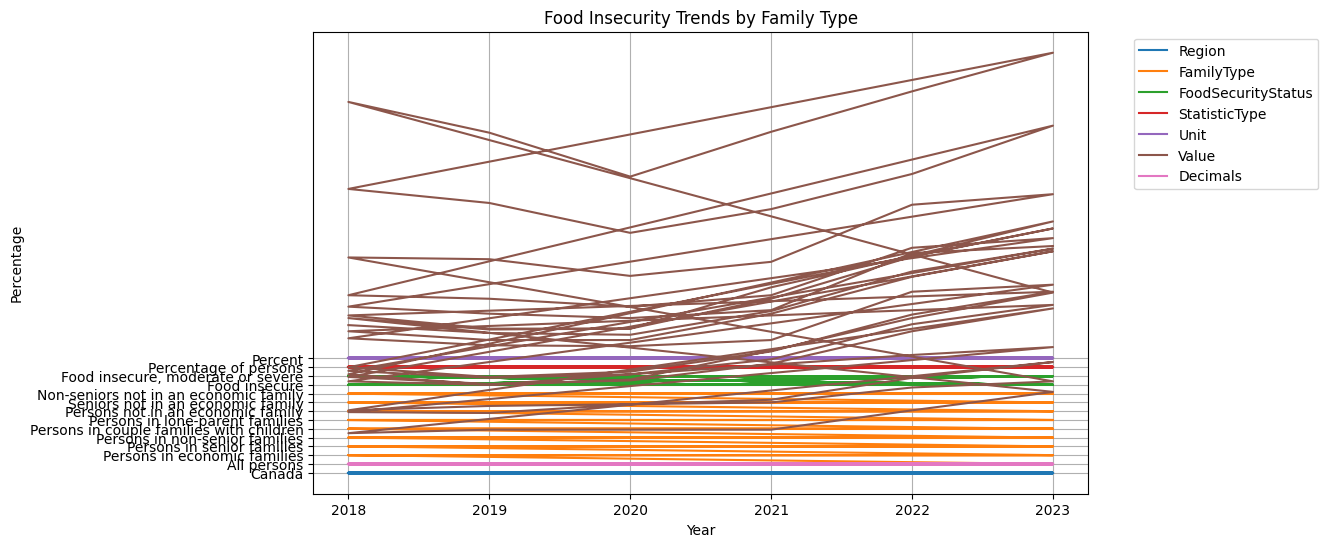

In [31]:
plt.figure(figsize=(10,6))

for col in df.columns:
    if col != 'Year':
        plt.plot(df['Year'], df[col], label=col)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Food Insecurity Trends by Family Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Compute year-over-year % change

In [ ]:
numeric_cols = ['Value']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_yoy = df.set_index('Year')[numeric_cols].diff()
print(df_yoy.round(2))

      Value
Year       
2018    NaN
2019   -0.9
2020   -0.2
2021    2.7
2022    4.5
...     ...
2019   -0.8
2020   -0.5
2021    0.9
2022    6.5
2023    0.8

[108 rows x 1 columns]


Linear Regression trend

In [33]:
target_label = 'Food insecure'
df_target = df[df['FoodSecurityStatus'] == target_label].copy()

df_target['Year'] = pd.to_numeric(df_target['Year'], errors='coerce')
df_target = df_target.dropna(subset=['Year', 'Value'])


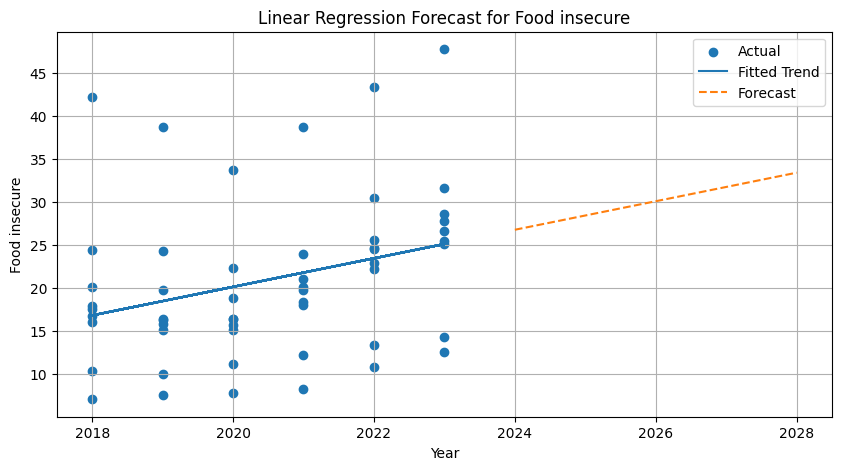

In [ ]:
X = df_target[['Year']]
y = df_target['Value']

model = LinearRegression()
model.fit(X, y)

# Predict next 5 years
future_years = pd.DataFrame(
    np.arange(df_target['Year'].max() + 1, df_target['Year'].max() + 6),
    columns=['Year']
)
future_pred = model.predict(future_years)

plt.figure(figsize=(10,5))
plt.scatter(df_target['Year'], y, label='Actual')
plt.plot(df_target['Year'], model.predict(X), label='Fitted Trend')
plt.plot(future_years, future_pred, '--', label='Forecast')
plt.xlabel('Year')
plt.ylabel(target_label)
plt.title(f'Linear Regression Forecast for {target_label}')
plt.legend()
plt.grid(True)
plt.show()
